In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import input_data

In [2]:
mnist = input_data.read_data_sets("tf_mnist", one_hot=True)

Extracting tf_mnist\train-images-idx3-ubyte.gz
Extracting tf_mnist\train-labels-idx1-ubyte.gz
Extracting tf_mnist\t10k-images-idx3-ubyte.gz
Extracting tf_mnist\t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 1e-2
n_train_steps = 20
batch_size = 128
display_step = 1
n_examples_to_show = 10

In [4]:
n_h1 = 256
n_h2 = 128
n_input = 784

In [5]:
def encoder(x, w, b):
    eh1 = tf.nn.sigmoid( tf.matmul(x,   w['eh1']) + b['eh1'] )
    eh2 = tf.nn.sigmoid( tf.matmul(eh1, w['eh2']) + b['eh2'] )
    return eh2

In [6]:
def decoder(x, w, b):
    dh1 = tf.nn.sigmoid( tf.matmul(x,   w['dh1'] + b['dh1']) )
    dh2 = tf.nn.sigmoid( tf.matmul(dh1, w['dh2'] + b['dh2']) )
    return dh2

In [7]:
graph = tf.Graph()

with graph.as_default():
    
    Xtr = tf.placeholder(tf.float32, [None, n_input])
    
    weights = {
        'eh1': tf.Variable(tf.random_normal([n_input, n_h1])),
        'eh2': tf.Variable(tf.random_normal([n_h1, n_h2])),
        'dh1': tf.Variable(tf.random_normal([n_h2, n_h1])),
        'dh2': tf.Variable(tf.random_normal([n_h1, n_input])),
    }
    biases = {
        'eh1': tf.Variable(tf.zeros([n_h1])),
        'eh2': tf.Variable(tf.zeros([n_h2])),
        'dh1': tf.Variable(tf.zeros([n_h1])), 
        'dh2': tf.Variable(tf.zeros([n_input])),
    }
        
    encoder_op = encoder(Xtr, weights, biases)
    Ypred = decoder(encoder_op, weights, biases)
    
    cost = tf.reduce_mean( tf.pow(Ypred - Xtr, 2) )
    train_op = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [8]:
with tf.Session(graph=graph) as sess:
    
    tf.global_variables_initializer().run()
    
    total_batch = int(mnist.train.num_examples/batch_size)
    for step in range(n_train_steps):
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c_ = sess.run([train_op, cost], feed_dict={ Xtr: batch_x })
        if step % display_step == 0:
            print ("Step: %d, cost: %.4f"% (step, c_))
    
    print ("Optimization Finished!")
    
    encode_decode_test = sess.run(Ypred, feed_dict={
        Xtr: mnist.test.images[:n_examples_to_show]})                

Step: 0, cost: 0.1203
Step: 1, cost: 0.0948
Step: 2, cost: 0.0845
Step: 3, cost: 0.0766
Step: 4, cost: 0.0724
Step: 5, cost: 0.0661
Step: 6, cost: 0.0666
Step: 7, cost: 0.0654
Step: 8, cost: 0.0612
Step: 9, cost: 0.0588
Step: 10, cost: 0.0609
Step: 11, cost: 0.0577
Step: 12, cost: 0.0564
Step: 13, cost: 0.0563
Step: 14, cost: 0.0542
Step: 15, cost: 0.0527
Step: 16, cost: 0.0527
Step: 17, cost: 0.0545
Step: 18, cost: 0.0512
Step: 19, cost: 0.0532
Optimization Finished!


D:\py\A3_64\envs\tensorflow-3-64\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


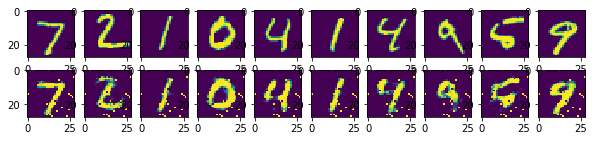

In [9]:
f, a = plt.subplots(2, 10, figsize=(10,2) )
for i in range(n_examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    a[1][i].imshow(np.reshape(encode_decode_test[i], (28,28)))
f.show()
plt.draw()